<a href="https://colab.research.google.com/github/tadavarthi-rishi/image-classifications/blob/master/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline
if not os.path.isdir('models'):
  os.mkdir('models')
print(tf.__version__)
print(tf.test.is_gpu_available())

2.2.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
False


In [6]:
def get_three_classes(x,y):
  indices_0,_ = np.where(y==0)
  indices_1,_ = np.where(y==1)
  indices_2,_ = np.where(y==2)
  indices=np.concatenate([indices_0,indices_1,indices_2],axis=0)
  x=x[indices]
  y=y[indices]
  count=x.shape[0]
  indices=np.random.choice(range(count),count,replace=False)
  x=x[indices]
  y=y[indices]
  y=tf.keras.utils.to_categorical(y)
  return x,y


In [7]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()
x_train,y_train=get_three_classes(x_train,y_train)
x_test,y_test=get_three_classes(x_test,y_test)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


In [8]:
class_names=['aeroplane','car','bird']
def show_random_examples(x,y,p):
  indices=np.random.choice(range(x.shape[0]),10,replace=False)
  x=x[indices]
  y=y[indices]
  p=p[indices]
  plt.figure(figsize=(10,5))
  for i in range(10):
    plt.subplot(2,5,1+i)
    plt.imshow(x[i])
    plt.xticks([])
    plt.yticks([])
    col='green' if np.argmax(y[i])==np.argmax(p[i]) else 'red'
    plt.xlabel(class_names[np.argmax(p[i])],color=col)
    plt.show()


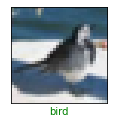

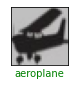

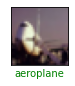

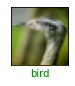

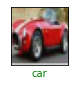

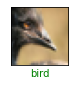

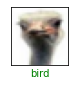

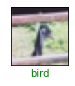

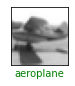

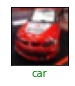

In [12]:
show_random_examples(x_train,y_train,y_train)


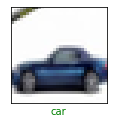

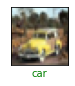

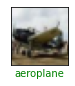

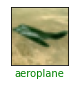

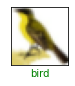

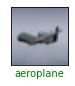

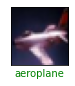

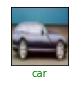

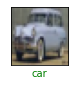

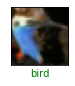

In [10]:
show_random_examples(x_test,y_test,y_test)

In [13]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.layers import Dropout,Flatten,Input,Dense
def create_model():
  def add_conv_block(model,num_filters):
    model.add(Conv2D(num_filters,3,activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(num_filters,3,activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Dropout(0.5))
    return model
  model=tf.keras.models.Sequential()
  model.add(Input(shape=(32,32,3)))
  model=add_conv_block(model,32)
  model=add_conv_block(model,64)
  model=add_conv_block(model,128)
  model.add(Flatten())
  model.add(Dense(3,activation='softmax'))
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  return model
model=create_model()
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 64)        2

In [33]:
h=model.fit(x_train/255.,y_train,validation_data=(x_test/255.,y_test),epochs=20,batch_size=128,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3)])



Epoch 1/20
118/118 [==============================] - 87s 739ms/step - loss: 0.2031 - accuracy: 0.9216 - val_loss: 0.2465 - val_accuracy: 0.9060
Epoch 2/20
118/118 [==============================] - 86s 731ms/step - loss: 0.1968 - accuracy: 0.9257 - val_loss: 0.3634 - val_accuracy: 0.8677
Epoch 3/20
118/118 [==============================] - 93s 785ms/step - loss: 0.1935 - accuracy: 0.9265 - val_loss: 0.2142 - val_accuracy: 0.9153
Epoch 4/20
118/118 [==============================] - 89s 756ms/step - loss: 0.1823 - accuracy: 0.9314 - val_loss: 0.4312 - val_accuracy: 0.8550
Epoch 5/20
118/118 [==============================] - 89s 751ms/step - loss: 0.1696 - accuracy: 0.9347 - val_loss: 0.2723 - val_accuracy: 0.9010
Epoch 6/20
118/118 [==============================] - 91s 768ms/step - loss: 0.1736 - accuracy: 0.9339 - val_loss: 0.3614 - val_accuracy: 0.8713


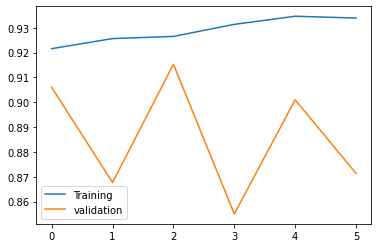

In [34]:
accs=h.history['accuracy']
val_acc=h.history['val_accuracy']
plt.plot(range(len(accs)),accs,label='Training')
plt.plot(range(len(accs)),val_acc,label='validation')
plt.legend()
plt.show()


In [35]:
preds=model.predict(x_test/255.)


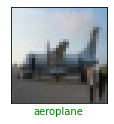

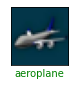

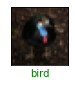

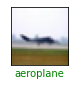

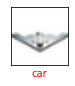

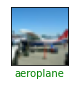

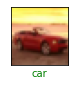

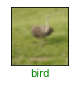

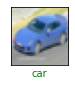

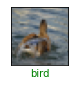

In [38]:
show_random_examples(x_test,y_test,preds)